In [1]:
from datetime import date
import requests
import pandas as pd

url = ("https://api.worldbank.org/v2/country/COL/indicator/SI.POV.DDAY?"
        "per_page=16104"
        "&format=json"
        "&date=2009:2019")
response = requests.get(url)
database=response.json()
print(response.json())
df=pd.DataFrame.from_dict(database[1])
df

[{'page': 1, 'pages': 1, 'per_page': 16104, 'total': 11, 'sourceid': '2', 'sourcename': 'World Development Indicators', 'lastupdated': '2021-06-30'}, [{'indicator': {'id': 'SI.POV.DDAY', 'value': 'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)'}, 'country': {'id': 'CO', 'value': 'Colombia'}, 'countryiso3code': 'COL', 'date': '2019', 'value': 4.9, 'unit': '', 'obs_status': '', 'decimal': 1}, {'indicator': {'id': 'SI.POV.DDAY', 'value': 'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)'}, 'country': {'id': 'CO', 'value': 'Colombia'}, 'countryiso3code': 'COL', 'date': '2018', 'value': 4.2, 'unit': '', 'obs_status': '', 'decimal': 1}, {'indicator': {'id': 'SI.POV.DDAY', 'value': 'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)'}, 'country': {'id': 'CO', 'value': 'Colombia'}, 'countryiso3code': 'COL', 'date': '2017', 'value': 4, 'unit': '', 'obs_status': '', 'decimal': 1}, {'indicator': {'id': 'SI.POV.DDAY', 'value': 'Poverty headc

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'SI.POV.DDAY', 'value': 'Poverty headco...","{'id': 'CO', 'value': 'Colombia'}",COL,2019,4.9,,,1
1,"{'id': 'SI.POV.DDAY', 'value': 'Poverty headco...","{'id': 'CO', 'value': 'Colombia'}",COL,2018,4.2,,,1
2,"{'id': 'SI.POV.DDAY', 'value': 'Poverty headco...","{'id': 'CO', 'value': 'Colombia'}",COL,2017,4.0,,,1
3,"{'id': 'SI.POV.DDAY', 'value': 'Poverty headco...","{'id': 'CO', 'value': 'Colombia'}",COL,2016,4.5,,,1
4,"{'id': 'SI.POV.DDAY', 'value': 'Poverty headco...","{'id': 'CO', 'value': 'Colombia'}",COL,2015,4.6,,,1
5,"{'id': 'SI.POV.DDAY', 'value': 'Poverty headco...","{'id': 'CO', 'value': 'Colombia'}",COL,2014,5.0,,,1
6,"{'id': 'SI.POV.DDAY', 'value': 'Poverty headco...","{'id': 'CO', 'value': 'Colombia'}",COL,2013,5.6,,,1
7,"{'id': 'SI.POV.DDAY', 'value': 'Poverty headco...","{'id': 'CO', 'value': 'Colombia'}",COL,2012,6.2,,,1
8,"{'id': 'SI.POV.DDAY', 'value': 'Poverty headco...","{'id': 'CO', 'value': 'Colombia'}",COL,2011,6.3,,,1
9,"{'id': 'SI.POV.DDAY', 'value': 'Poverty headco...","{'id': 'CO', 'value': 'Colombia'}",COL,2010,7.8,,,1


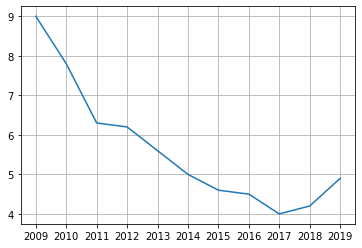

In [9]:
import matplotlib.pyplot as plt

dataset=df.sort_values(by="date",ascending=True)
plt.plot('date','value',data=dataset)
plt.grid()

In [15]:
import numpy as np
from sklearn.linear_model import  LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import time 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

def regresion_lineal(data,grado):

  poly_model = make_pipeline(PolynomialFeatures(grado), LinearRegression())
  y_train=[];

  for i in range(0,len(data)-1):
    y_train.append(dataset.values[i][4])

  X_train=[0,1,2,3,4,5,6,7,8,9];

  x=np.array(X_train);
  y=np.array(y_train);


  poly_model.fit(x[:, np.newaxis], y)

  xfit = np.linspace(0, 10, 1000)
  yfit = poly_model.predict(xfit[:, np.newaxis])


  poly = PolynomialFeatures(grado, include_bias=False)
  X_poly = poly.fit_transform(x[:, None])

  X_train, x_eval, y_train, y_eval = train_test_split(X_poly, y)#, test_size=0.5, shuffle=False)

  linear_model = LinearRegression()
  start_time = time.process_time()
  linear_model.fit(X_train, y_train)

  y_pred_in = linear_model.predict(X_train)
  y_pred_out = linear_model.predict(x_eval)

  print('Modelo lineal')
  print('Coeficientes',linear_model.coef_)
  print('Intercepto',linear_model.intercept_)
  print('El tiempo de ejecución es',time.process_time() - start_time, 'segundos')
  print('El error cuadratico dentro de la muestra',mean_squared_error(y_train, y_pred_in))
  print('El error cuadratico fuera de la muestra',mean_squared_error(y_eval, y_pred_out))

  return x,y,xfit,yfit,X_train[:, 0], y_pred_in,x_eval[:, 0], y_pred_out;

def regresion_ridge(data,grado):

  poly_model = make_pipeline(PolynomialFeatures(grado), LinearRegression())
  y_train=[];

  for i in range(0,len(data)-1):
    y_train.append(dataset.values[i][4])

  X_train=[0,1,2,3,4,5,6,7,8,9];

  x=np.array(X_train);
  y=np.array(y_train);


  poly_model.fit(x[:, np.newaxis], y)

  xfit = np.linspace(0, 10, 1000)
  yfit = poly_model.predict(xfit[:, np.newaxis])


  poly = PolynomialFeatures(grado, include_bias=False)
  X_poly = poly.fit_transform(x[:, None])

  X_train, x_eval, y_train, y_eval = train_test_split(X_poly, y)#, test_size=0.5, shuffle=False)

  ridge_model = Ridge(alpha = 1)
  start_time = time.process_time()
  ridge_model.fit(X_train, y_train)

  y_pred_in = ridge_model.predict(X_train)
  y_pred_out = ridge_model.predict(x_eval)

  print('El modelo Ridge')
  print('Los coeficientes son',ridge_model.coef_)
  print('El intercepto es', ridge_model.intercept_)
  print('El tiempo de ejecución es', time.process_time() - start_time, 'segundos')
  print('El error cuadratico dentro de muestra es', mean_squared_error(y_train, y_pred_in))
  print('El error cuadratico fuera de muestra es', mean_squared_error(y_eval, y_pred_out))

  return x,y,xfit,yfit,X_train[:, 0], y_pred_in,x_eval[:, 0], y_pred_out;

def regresion_lasso(data,grado):

  poly_model = make_pipeline(PolynomialFeatures(grado), LinearRegression())
  y_train=[];

  for i in range(0,len(data)-1):
    y_train.append(dataset.values[i][4])

  X_train=[0,1,2,3,4,5,6,7,8,9];

  x=np.array(X_train);
  y=np.array(y_train);


  poly_model.fit(x[:, np.newaxis], y)

  xfit = np.linspace(0, 10, 1000)
  yfit = poly_model.predict(xfit[:, np.newaxis])


  poly = PolynomialFeatures(grado, include_bias=False)
  X_poly = poly.fit_transform(x[:, None])

  X_train, x_eval, y_train, y_eval = train_test_split(X_poly, y)#, test_size=0.5, shuffle=False)

  lasso_model = Lasso(alpha = 0.5)
  start_time = time.process_time()
  lasso_model.fit(X_train, y_train)

  y_pred_in = lasso_model.predict(X_train)
  y_pred_out = lasso_model.predict(x_eval)

  print('Modelo Lasso')
  print('Los coeficientes son',lasso_model.coef_)
  print('El intercepto es', lasso_model.intercept_)
  print('El tiempo de ejecución es', time.process_time() - start_time, 'segundos')
  print('El error cuadratico dentro de muestra es', mean_squared_error(y_train, y_pred_in))
  print('El error cuadratico fuera de muestra es', mean_squared_error(y_eval, y_pred_out))

  return x,y,xfit,yfit,X_train[:, 0], y_pred_in,x_eval[:, 0], y_pred_out;

def regresion_elasticnet(data,grado):
  
  poly_model = make_pipeline(PolynomialFeatures(grado), LinearRegression())
  y_train=[];

  for i in range(0,len(data)-1):
    y_train.append(dataset.values[i][4])

  X_train=[0,1,2,3,4,5,6,7,8,9];

  x=np.array(X_train);
  y=np.array(y_train);


  poly_model.fit(x[:, np.newaxis], y)

  xfit = np.linspace(0, 10, 1000)
  yfit = poly_model.predict(xfit[:, np.newaxis])


  poly = PolynomialFeatures(grado, include_bias=False)
  X_poly = poly.fit_transform(x[:, None])

  X_train, x_eval, y_train, y_eval = train_test_split(X_poly, y)#, test_size=0.5, shuffle=False)

  elasticnet_model = ElasticNet(alpha =0.5, l1_ratio=0.5)
  start_time = time.process_time() #Hora local del servidor
  elasticnet_model.fit(X_train, y_train)

  y_pred_in = elasticnet_model.predict(X_train)
  y_pred_out = elasticnet_model.predict(x_eval)

  print('El modelo ElasticNET')
  print('Los coeficientes son',elasticnet_model.coef_)
  print('El intercepto es', elasticnet_model.intercept_)
  print('El tiempo de ejecución es', time.process_time() - start_time, 'segundos')
  print('El error cuadratico dentro de muestra es', mean_squared_error(y_train, y_pred_in))
  print('El error cuadratico fuera de muestra es', mean_squared_error(y_eval, y_pred_out))

  return x,y,xfit,yfit,X_train[:, 0], y_pred_in,x_eval[:, 0], y_pred_out;


# Regresión Lineal

Se extrajo de una base de datos de la URL suminstrada por el banco Mundial,se realizo un filtro para discriminar por paises y obtener solo la información de Colombia.

El resultado obtenido muestra el indice de pobreza en el pais entre los años 2009 y 2019, el objetivo es desarrollar un modelo capaz de predecir el comportamiento de este indice a traves de lo años.

A continuación se muestran 3 escenarios en donde se modifica el grado del polinomio que estima el modelo para identificar en cual de ellos se ajustan mejor los datos.

# Regresion Ridge

#Regresion Lasso

#Regresion ElasticNET

## Utilizar el widget para controlar el grado del polinomio para las diferentes regresiones

In [7]:
import ipywidgets as widgets
w=widgets.IntSlider(2,2,10,1)
display(w)

IntSlider(value=2, max=10, min=2)

In [25]:
lineal=regresion_lineal(dataset,w.value);
lasso=regresion_lasso(dataset,w.value);
ridge=regresion_ridge(dataset,w.value);
elasticnet=regresion_elasticnet(dataset,w.value);


Modelo lineal
Coeficientes [-4.12985263e+00  2.41816991e+00 -6.52930583e-01  7.67548504e-02
 -3.23638859e-03]
Intercepto 8.999031525273288
El tiempo de ejecución es 0.0043054009999998755 segundos
El error cuadratico dentro de la muestra 0.0008404977311158387
El error cuadratico fuera de la muestra 0.5949654345559064
Modelo Lasso
Los coeficientes son [-0.         -0.17056423  0.00023208  0.00358465 -0.00023351]
El intercepto es 7.873613751289321
El tiempo de ejecución es 0.0036930990000012542 segundos
El error cuadratico dentro de muestra es 0.3387451262103211
El error cuadratico fuera de muestra es 0.04594752181941677
El modelo Ridge
Los coeficientes son [-0.51817407 -0.50977853  0.17980111 -0.02217521  0.00094613]
El intercepto es 8.664415158014064
El tiempo de ejecución es 0.003532567000000597 segundos
El error cuadratico dentro de muestra es 0.0453549715799366
El error cuadratico fuera de muestra es 0.09517517036266461
El modelo ElasticNET
Los coeficientes son [-0.00000000e+00 -1.28

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4690951373429257, tolerance: 0.0020557142857142857
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.389082173412445, tolerance: 0.0011088571428571428
  positive)


Grafica de las cuatro regresiones para grado 5


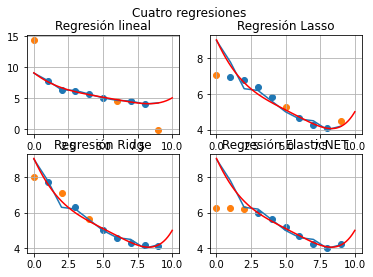

In [24]:

fig, axs = plt.subplots(2,2)
axs[0,0].plot(lineal[0], lineal[1])
axs[0,0].plot(lineal[2], lineal[3],'r')
axs[0,0].scatter(lineal[4],lineal[5])
axs[0,0].scatter(lineal[6], lineal[7])
axs[0,0].set_title('Regresión lineal')
axs[0,0].grid()

axs[0,1].plot(lasso[0], lasso[1])
axs[0,1].plot(lasso[2], lasso[3],'r')
axs[0,1].scatter(lasso[4],lasso[5])
axs[0,1].scatter(lasso[6], lasso[7])
axs[0,1].set_title('Regresión Lasso')
axs[0,1].grid()

axs[1,0].plot(ridge[0], ridge[1])
axs[1,0].plot(ridge[2], ridge[3],'r')
axs[1,0].scatter(ridge[4],ridge[5])
axs[1,0].scatter(ridge[6], ridge[7])
axs[1,0].set_title('Regresión Ridge')
axs[1,0].grid()


axs[1,1].plot(elasticnet[0], elasticnet[1])
axs[1,1].plot(elasticnet[2], elasticnet[3],'r')
axs[1,1].scatter(elasticnet[4],elasticnet[5])
axs[1,1].scatter(elasticnet[6], elasticnet[7])
axs[1,1].set_title('Regresión ElasticNET')
axs[1,1].grid()
print('Grafica de las cuatro regresiones para grado',w.value)
fig.suptitle('Cuatro regresiones');

### Comparación de las cuatros regresiones para diferentes  grados del polinomio en referencia al error cuadratico adentro y afuera de la muestra,lo ideal indicaria que entre mas cercano a cero ambos error la regresión se ajusta perfectamente a los datos.

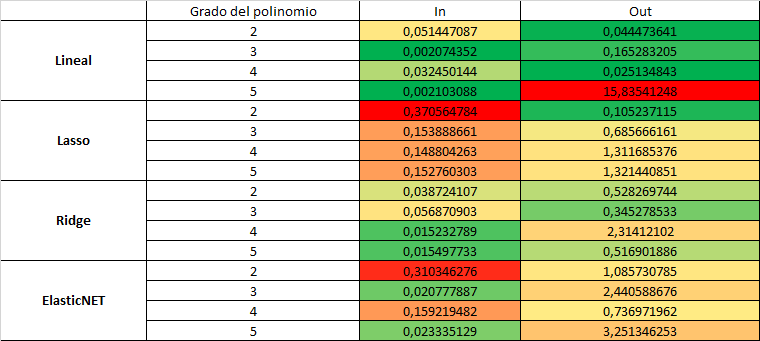